# Aula prática: Análise de Componentes Principais (PCA) em python.

In [1]:
# Como primeiro passo, vamos importar a biblioteca pandas:
import pandas as pd

# O scikit-learn possui alguns conjuntos de dados prontos para uilitzarmos em aulas práticas. Nesse caso, 
# vamos usar o scikit-learn para importar um dataset de caracteres manuscritos, somente como exemplo:
from sklearn.datasets import load_digits

In [2]:
# Vamos carregar nosso dataset de dígitos, e explorá-lo um pouco:
dataset = load_digits()

print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
print(dataset)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [4]:
# Vamos agora ver o campo data (os nossos x's do dataset):
print(dataset.data.shape) # << Deveriam ser 1797 imagens de tamanho 8x8=64 pixels (veremos os valores).

(1797, 64)


In [5]:
# Vejamos o primeiro vetor de x's. Repare que os pixels já foram convertidos em valores correspondentes a sua cor:
print( dataset.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [6]:
# Para vermos esse array de 64 valores como uma imagem, primeiro temos que transformá-lo numa matrix 8x8:
print(dataset.data[0].reshape(8,8))


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

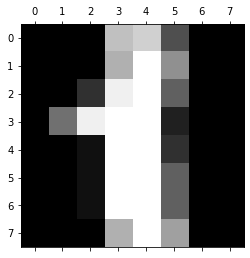

In [7]:
# Para vermos esse vetor de números como a imagem original, vamos utilizar a matplotlib:
from matplotlib import pyplot as plt

plt.gray() # << Vamos ver imagens em escala de cinza:

# Plotando nossos exemplos do dataset como imagens:
plt.matshow(dataset.data[1].reshape(8,8))


In [8]:
# Agora que vimos os valores de entrada (nossos x's) podemos ver os valores correspondentes de saída (y's):
import numpy as np

print(dataset.target[0]) # << Como podemos ver, a primeira imagem é um zero!

# Podemos ver agora todos os tipos de saídas (y's) existentes no dataset:
np.unique(dataset.target)

0


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Agora que já exploramos os dados, criando nosso dataframe:

In [9]:
# Criando nosso dataframe:
df = pd.DataFrame( dataset.data, columns=dataset.feature_names)

# Imprimindo os primeiros valores, só para confirmar o resultado:
df.tail(4)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0


In [10]:
# Vamos ver uma descrição do dataset (estatísticas):
df.describe() # Vamos ver que os valores dos pixels vão de 0 a 16!


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [11]:
# Criando nossos X's e nossos y's correspondentes:
X = df
y = dataset.target

In [12]:
# Para utilizarmos qualquer PCA, o primeiro passo consiste em escalonar nossos dados para média 0 e Var 1:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Escalonando nosso dataset para que os valores tenham média 0 e variância 1.0:
X_scaled = scaler.fit_transform(X)

# Podemos ver que a relação entre os valores dos pixels se manteve, mas escalonados [-1.0, 1.0]:
print(X_scaled)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [21]:
# Lembrem-se das nossas aulas anteriores. Precisamos dividir nosso dataset entre conjuntos de treino e teste:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.20, random_state=30)

In [22]:
# Somente como exemplo, vamos usar um algoritmo de Regressão logística (podemos usar outros depois):
from sklearn.linear_model import LogisticRegression

# Criando o modelo:
model = LogisticRegression()
# Passando o conjunto de treino:
model.fit( X_train, y_train)
# E o conjutno de testes:
model.score(X_test, y_test)

0.9722222222222222

In [15]:
# Agora podemos usar PCA nas amostras e ver como ele vai funcionar:
from sklearn.decomposition import PCA

# Podemos "forçar" o número de variáveis, ou estabelecer a porcentagem de variância que queremos capturar:

# Forçando o número de componentes seria:
# pca = PCA(n_components=3)

# Fixando somente a variância:
pca = PCA(0.3) # << Capturando 95% da variância.
# Calculando o PCA:
X_pca = pca.fit_transform(X)

# Imprimindo o novo shape, ou seja, o número de novos x's (o original é 64):
print(X_pca.shape)

(1797, 3)


In [16]:
# Vamos imprimir a captura de variância de cada dimensão do PCA. Claro, as primeiras dimensões deveriam ser 
# as mais importantes, portanto capturando mais variância:
print(pca.explained_variance_ratio_)

[0.14890594 0.13618771 0.11794594]


In [17]:
# Agora podemos treinar nosso algoritmo novamente, utilizando os mesmos y's como saída, mas substituindo as 
# entradas originais pelas entradas fornecidas pelo PCA:

# Dividindo o dataset novamente em treino e teste:
X_train_pca, X_test_pca, y_train, y_test = train_test_split( X_scaled, y, test_size=0.40, random_state=30)

# Treinando novamente os dados:

# Criando o modelo:
model_pca = LogisticRegression(max_iter=2000)
# Passando o conjunto de treino:
model_pca.fit( X_train_pca, y_train)
# E o conjutno de testes:
model_pca.score(X_test_pca, y_test)


0.9707927677329624

# Exercícios:
 1. Modifique a quantidade de variância e gere vários treinamentos com PCAs diferentes;
 2. Utilize algum outro algoritmo de treinamento a sua escolha, e verifique o resultado que você consegue.

In [18]:
from sklearn import svm

In [19]:
# Criando o modelo:
model_pca = svm.SVC(max_iter=2000)
# Passando o conjunto de treino:
model_pca.fit( X_train_pca, y_train)
# E o conjutno de testes:
model_pca.score(X_test_pca, y_test)

0.9749652294853964

In [23]:
model1 = svm.SVC(max_iter=2000)
# Passando o conjunto de treino:
model1.fit( X_train, y_train)
# E o conjutno de testes:
model1.score(X_test, y_test)

0.9777777777777777

In [ ]:
Thiago Teixeira - 201910763, Marcos Vinicius - 201910150